In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('room_stats_2019.csv')
df.head()

,Room,Month,RM ARR,RM NIGHTS,ROOM REV,ADR,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,201,January,6,12,"1,747.50",145.63,NaN,NaN,NaN,NaN
1,201,February,8,10,"1,459.84",145.98,NaN,NaN,NaN,NaN
2,201,March,14,20,"2,874.84",143.74,NaN,NaN,NaN,NaN
3,201,April,10,19,"3,225.00",169.74,NaN,NaN,NaN,NaN
4,201,May,9,19,"3,023.90",159.15,NaN,NaN,NaN,NaN


In [27]:
df.dtypes

Room            int64
Month          object
RM ARR          int64
RM NIGHTS       int64
ROOM REV       object
ADR           float64
Unnamed: 6    float64
Unnamed: 7    float64
Unnamed: 8     object
Unnamed: 9    float64
dtype: object

In [28]:
df.drop(columns=['Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'], inplace=True)

In [29]:
df['ROOM REV'] = df['ROOM REV'].map(lambda x:x.replace(',',''))

df['ROOM REV'] = df['ROOM REV'].astype(float)


,Room,Month,RM ARR,RM NIGHTS,ROOM REV,ADR
0,201,January,6,12,1747.50,145.63
1,201,February,8,10,1459.84,145.98
2,201,March,14,20,2874.84,143.74
3,201,April,10,19,3225.00,169.74
4,201,May,9,19,3023.90,159.15


In [138]:
# NEED TO SEE ROOM NIGHTS PER ROOM BY MONTH
test = pd.DataFrame(df.groupby(['Month','Room'])['RM NIGHTS'].sum())
test.reset_index(inplace=True)
test.head()

,Month,Room,RM NIGHTS
0,April,201,19
1,April,202,16
2,April,203,22
3,April,204,18
4,April,205,17


In [152]:
test2 = test.pivot(index='Room', columns='Month', values='RM NIGHTS')
test2.reset_index(inplace=True)
# test2 = [['']]
test2.head()

Month,Room,April,August,December,February,January,July,June,March,May,November,October,September
0,201,19.0,15.0,25.0,10.0,12.0,20.0,19.0,20.0,19.0,25.0,29.0,23.0
1,202,16.0,16.0,24.0,10.0,4.0,18.0,15.0,15.0,13.0,20.0,18.0,18.0
2,203,22.0,19.0,25.0,15.0,8.0,16.0,17.0,18.0,20.0,26.0,25.0,26.0
3,204,18.0,20.0,19.0,10.0,4.0,20.0,11.0,18.0,15.0,16.0,20.0,22.0
4,205,17.0,17.0,24.0,17.0,5.0,16.0,16.0,18.0,19.0,20.0,26.0,27.0


In [158]:
df_months = test2[['Room','January','February','March','April','May','June','July','August','September','October','November','December']]

In [6]:
# group by room and calc avg adr 
room_adr_avg = pd.DataFrame(df.groupby(['Room'])['ADR'].mean())
room_adr_avg['ADR'] = room_adr_avg['ADR'].map('{:,.2f}'.format)

room_adr_avg.head()

,ADR
Room,
201,156.11
202,176.14
203,146.14
204,180.48
205,152.64


In [7]:
#group by room and total rev
room_rev_sum = pd.DataFrame(df.groupby(['Room'])['ROOM REV'].sum())
room_rev_sum.head()

,ROOM REV
Room,
201,36943.07
202,32593.18
203,34857.26
204,34969.95
205,33962.31


In [8]:
# PLOT HISTOGRAM IN ORDER TO ASSIST IN COLOR BINNING

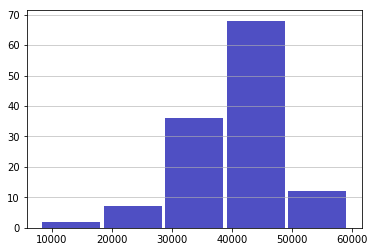

In [9]:
n, bins, patches = plt.hist(x=room_rev_sum['ROOM REV'], bins=5, color='#0504aa',
                            alpha=0.7, rwidth=0.95)
plt.grid(axis='y', alpha=0.75)

In [10]:
# group by room and total room nights
room_night_sum = pd.DataFrame(df.groupby(['Room'])['RM NIGHTS'].sum())
room_night_sum.head()

,RM NIGHTS
Room,
201,236
202,187
203,237
204,193
205,222


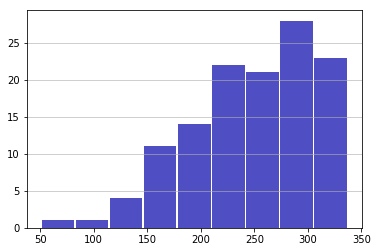

In [11]:
n, bins, patches = plt.hist(x=room_night_sum['RM NIGHTS'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.95)
plt.grid(axis='y', alpha=0.75)

In [12]:
room_data = pd.concat([room_adr_avg, room_rev_sum,room_night_sum], axis=1,)
room_data.reset_index(inplace=True)
room_data.head()

,Room,ADR,ROOM REV,RM NIGHTS
0,201,156.11,36943.07,236
1,202,176.14,32593.18,187
2,203,146.14,34857.26,237
3,204,180.48,34969.95,193
4,205,152.64,33962.31,222


In [13]:
room_data['FLOOR'] = room_data['Room'].astype(str).str[0]
room_data.head()

,Room,ADR,ROOM REV,RM NIGHTS,FLOOR
0,201,156.11,36943.07,236,2
1,202,176.14,32593.18,187,2
2,203,146.14,34857.26,237,2
3,204,180.48,34969.95,193,2
4,205,152.64,33962.31,222,2


In [14]:
import sqlalchemy 
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import func , create_engine , inspect , distinct , text

In [15]:
engine = create_engine('sqlite:////Users/epatel/workcode/Room_Statistics/room_stats_db.db', echo=True)
conn = engine.connect()


Base = automap_base()
Base.prepare(engine, reflect=True)
session = Session(engine)

2019-04-17 13:32:28,545 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-04-17 13:32:28,545 INFO sqlalchemy.engine.base.Engine ()
2019-04-17 13:32:28,545 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-04-17 13:32:28,545 INFO sqlalchemy.engine.base.Engine ()
2019-04-17 13:32:28,546 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-04-17 13:32:28,546 INFO sqlalchemy.engine.base.Engine ()
2019-04-17 13:32:28,546 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("room_stats")
2019-04-17 13:32:28,546 INFO sqlalchemy.engine.base.Engine ()
2019-04-17 13:32:28,546 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'room_stats' AND type = 'table'
2019-04-17 13:32:28,546 INFO sqlalchemy.engine.base.Engine ()
2019-04-17 13:32:28,546 INFO sqlalchemy.en

In [16]:
# room_data.to_sql('room_stats', engine,if_exists='append')